# Car Pplate Detector 

> PART 1

<img src="/Users/adrian/Desktop/PY-PROJECTS/Machine_Learning/cart-plate-detector/fonts/img/img1.jpg" style="width:300px;height 300px"/>

### Teaching a NN to "read" symbols from the image
* generate randomized images of different scales using PIL library
* train a network detect each symbol separatly

## Generate an image with a symbol

In [3]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
from matplotlib import pyplot as plt


SIZE = (100,100)
ANGLES = [ -6, -3 , 0, 3, 6]
CHARS = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-. "
CHARS_LEN = len(CHARS)
FONTS = ["arial", "courier", "times"]


def generateCharacter(char, size, color, bgColor, fontName, angle = 0):
    # GENERATE AN IMAGE WITH A SINGLE CHARACTER

    img = Image.new(mode="L", size = size, color = bgColor)
    draw = ImageDraw.Draw(img)

    font = ImageFont.truetype(f"./fonts/{fontName}.ttf", int(size[1] * 0.8))

    draw.text((15,5), char, fill=color, font=font)

    img = img.rotate(angle)

    return img
# img.show()


def charToOneHot(char):
    index = CHARS.index(char)
    length = CHARS_LEN
    one_hot_vector = [0 for _ in range(index)] + [1] + [0 for _ in range(length - index - 1)]
    return one_hot_vector


In [4]:
# img1 = generateCharacter("y", SIZE, 255, 0, "courier", 45)

# plt.figure()
# plt.imshow(img1)
# img2 = generateCharacter("y", SIZE, 255, 0, "times")

# plt.figure()
# plt.imshow(img2)

# img3 = generateCharacter("y", SIZE, 255, 0, "arial")

# plt.figure()
# plt.imshow(img3)

# print(charToOneHot("."))
# print(len(charToOneHot(".")))

# CREATE THE DATASET

In [5]:
import numpy as np

data_x = None
data_y = None

i = 0
for angle in ANGLES:
    for font in FONTS:
        for c in CHARS:
            img = generateCharacter(c, SIZE, 255, 0, font, angle)
            if i == 0:
                data_x = np.array([np.array(img)])
                data_y = np.array([charToOneHot(c)])
            else:    
                data_x = np.append(data_x, [np.array(img)], axis=0)
                data_y = np.append(data_y, [charToOneHot(c)], axis=0)

            i += 1

for i in range(1000):
    img = np.random.rand(100,100)
    data_x = np.append(data_x, [img], axis=0)
    data_y = np.append(data_y, [charToOneHot(" ")], axis=0)

print(f"generated {data_x.shape} matrix with images")    
print(f"generated {data_y.shape} matrix with labels")    
# print(data_y)
# print(data_x)

generated (1975, 100, 100) matrix with images
generated (1975, 65) matrix with labels


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


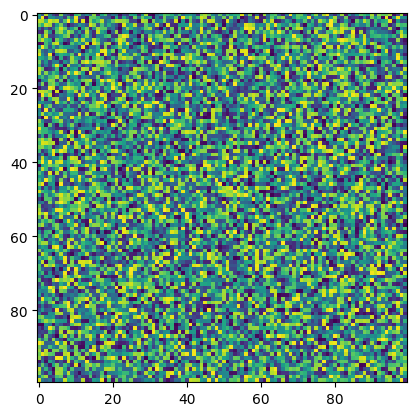

In [6]:
plt.imshow(data_x[1100])
print(data_y[1100])

IndexError: index 15 is out of bounds for axis 0 with size 15

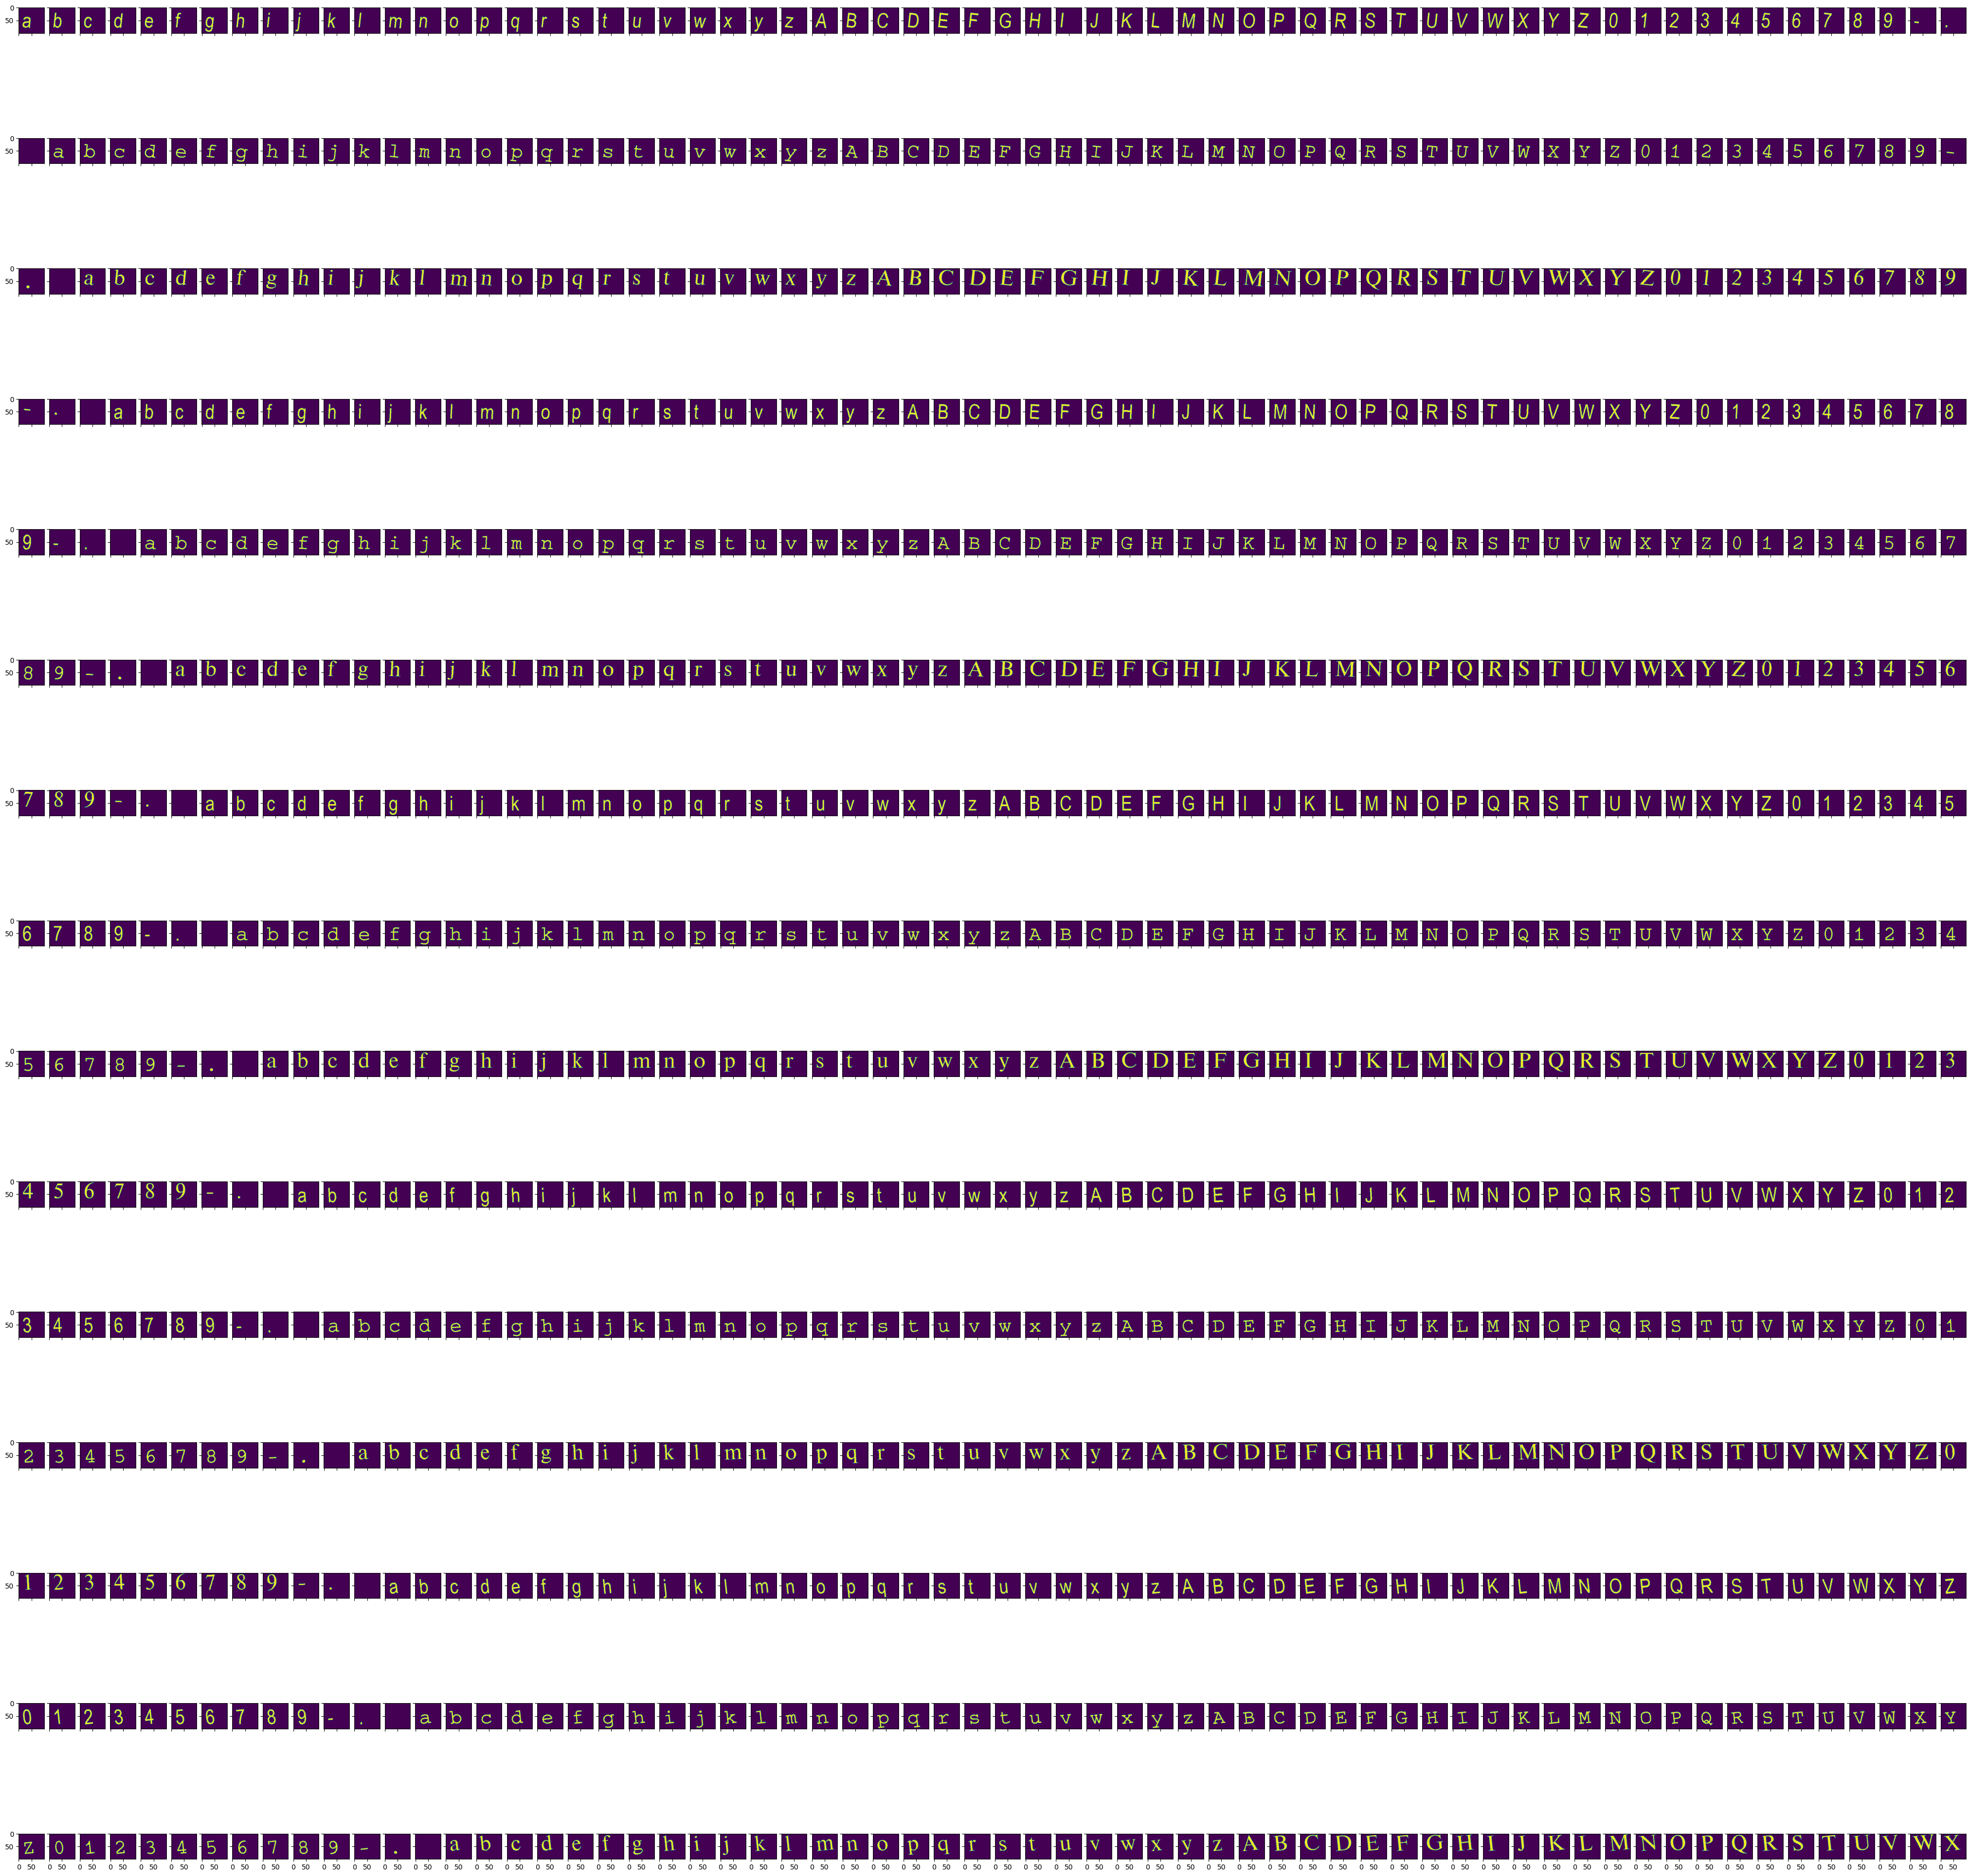

In [9]:
fig= plt.figure(figsize=(50,50))
grid= fig.add_gridspec(15,64)
axis= grid.subplots(sharex= 'col', sharey= 'row')

r= 0
c= 0
for i in range(data_x.shape[0]):

    axis[r,c].imshow(data_x[i])
    c += 1
    if c == 64:
        r += 1 
        c = 0
plt.show()

## One HOT ENCODING

In [10]:
alphabet = ['a', 'b', 'c']

#[
#  [1,0,0], - a
#  [0,1,0], - b
#  [0,0,1], - c
# ]

## Create a basic NN

   input 100x100 ---> CNN(64 x 100x100) ---> DNN(64 x 512)---> LLN(512 x 64) ---> output 64     



In [11]:
import torch, torch.nn as nn, torch.optim as optim


model = nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=CHARS_LEN, kernel_size=(100,100)),
    nn.Flatten(start_dim=0),
    nn.Linear(in_features=CHARS_LEN, out_features=512),
    nn.Sigmoid(),
    nn.Linear(in_features=512, out_features=CHARS_LEN),
)

# Pass one sample thorugth the NN

In [12]:
x = torch.from_numpy(data_x[1]).type(torch.FloatTensor).view(1,100,100)
# plt.imshow(x)
print(x.shape)

y = torch.argmax(model(x))

print(CHARS[y])

torch.Size([1, 100, 100])
T


# Training loop

In [13]:
criterion  = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


for epoch in range(1,101):
    avg_loss = 0
    print(f"epoch {epoch:5} started ...", end="")
    for i in range(len(data_x)):
        x = torch.from_numpy(data_x[i]).type(torch.FloatTensor).view(1,100,100)
        y = torch.from_numpy(data_y[i]).type(torch.FloatTensor)

        optimizer.zero_grad()
        yp = model(x)
        loss = criterion(yp, y)
        loss.backward()
        optimizer.step()

        avg_loss += loss.item()
    avg_loss /= len(data_x)        
    print(f" finished {avg_loss:f}")    
    # break

epoch     1 started ... finished 0.089013
epoch     2 started ... finished 0.049478
epoch     3 started ... finished 0.048215
epoch     4 started ... finished 0.047359
epoch     5 started ... finished 0.046689
epoch     6 started ... finished 0.045879
epoch     7 started ... finished 0.045230
epoch     8 started ... finished 0.044630
epoch     9 started ... finished 0.044095
epoch    10 started ... finished 0.043546
epoch    11 started ... finished 0.043061
epoch    12 started ... finished 0.042591
epoch    13 started ... finished 0.042134
epoch    14 started ... finished 0.041749
epoch    15 started ... finished 0.041371
epoch    16 started ... finished 0.040969
epoch    17 started ... finished 0.040597
epoch    18 started ... finished 0.040251
epoch    19 started ... finished 0.039880
epoch    20 started ... finished 0.039506
epoch    21 started ... finished 0.039161
epoch    22 started ... finished 0.038844
epoch    23 started ... finished 0.038474
epoch    24 started ... finished 0

# Estimate accuracy

In [14]:

accuracy = 0
print("estimating accuracy ", end="")
for i in range(len(data_x)):
    x = torch.from_numpy(data_x[i]).type(torch.FloatTensor).view(1,100,100)
    y = torch.from_numpy(data_y[i]).type(torch.FloatTensor)
    yp = model(x)

    if torch.argmax(y) == torch.argmax(yp):
        accuracy += 1


accuracy = 100 * accuracy / len(data_x)

print(f" = {accuracy} %")


estimating accuracy  = 99.69620253164557 %


# Manual test


' '


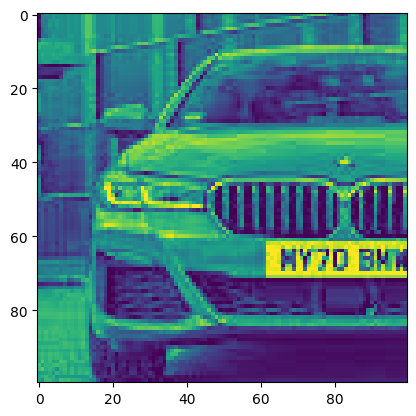

In [16]:
# img = generateCharacter(",", SIZE, 255, 0, "arial", 0)
img = Image.open("/Users/adrian/Desktop/PY-PROJECTS/Machine_Learning/cart-plate-detector/fonts/img/img2.jpg")
img = ImageOps.grayscale(img)
img = np.array(img)
img = img[50:150,50:150]
# print(img.shape)
plt.imshow(img)
x = torch.from_numpy( np.array(img) ).type(torch.FloatTensor).view(1,100,100)
y = model(x)
print(f"'{CHARS[torch.argmax(y)]}'")


# Scanning Each 100x100 sector -> building the map

In [19]:
matrix = []
img = Image.open("/Users/adrian/Desktop/PY-PROJECTS/Machine_Learning/cart-plate-detector/fonts/img/img2.jpg")
img = ImageOps.grayscale(img)
img = np.array(img)

for r in range(180):
    row = []
    for c in range(280):

        imgs = img[r*10:r*10+100,c*10:c*10+100]
        # print(img.shape)
        # plt.figure()
        # plt.imshow(imgs)
        x = torch.from_numpy( np.array(imgs) ).type(torch.FloatTensor).view(1,100,100)
        y = model(x)
        c = CHARS[torch.argmax(y)]
        row.append(c)
        if c != ' ':
            print(c)
    matrix.append(row)    

print(matrix)

RuntimeError: shape '[1, 100, 100]' is invalid for input of size 9500